# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

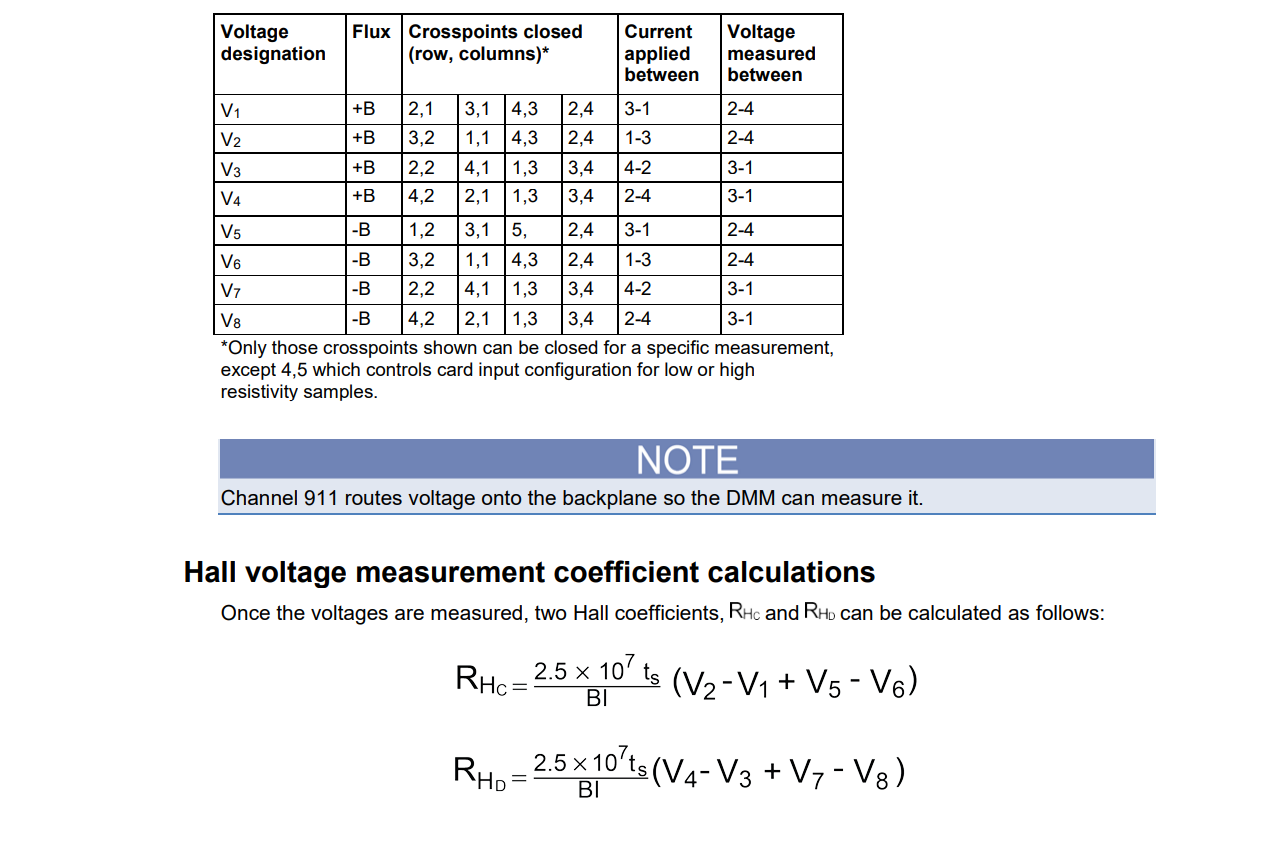

In [804]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [805]:
truncate = True # True it contains data from O to Bmax
path = "C:\\users\\Admin\\Desktop\\Analysis\\Plots\\LCMO_PLD2\\HALL"
filename = 'LCMO_PLD2_300K_HALL_+5T_to_-5T.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V2", "V1", "V4", "V3",'Rel_value','multiplier'])
df


,I,B,T,V2,V1,V4,V3,Rel_value,multiplier
0,0.000001,49999.591602,299.992789,-2856.606484,-578.239995,-4418.212319,170.663123,-0.000145,1000000.0
1,0.000001,49000.441797,299.996207,-2924.647609,-544.483501,-4482.832998,13.624638,-0.000117,1000000.0
2,0.000001,48000.578516,299.996953,-2959.596901,-502.578228,-4587.749939,-56.525524,-0.000129,1000000.0
3,0.000001,47000.233789,299.996831,-2982.874338,-517.226867,-4563.801254,-70.251639,-0.000136,1000000.0
4,0.000001,46000.420898,299.999380,-3009.308688,-465.521122,-4466.771025,67.137925,-0.000139,1000000.0
...,...,...,...,...,...,...,...,...,...
197,0.000001,46000.444141,299.995692,-4384.249948,76.023344,-4038.547396,-780.754561,-0.000146,1000000.0
198,0.000001,47000.380273,300.001225,-4350.615431,62.048812,-4026.647240,-903.861617,-0.000100,1000000.0
199,0.000001,48000.460938,300.000163,-4329.289943,96.849102,-4002.390486,-749.288276,-0.000137,1000000.0
200,0.000001,49000.496875,300.002769,-4331.413003,63.102004,-4012.692563,-816.874914,-0.000139,1000000.0


### Converting B to integer B

In [806]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [807]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.591602,50000,299.992789,-578.239995,-2856.606484,170.663123,-4418.212319,-0.000145,1000000.0
1,0.000001,49000.441797,49000,299.996207,-544.483501,-2924.647609,13.624638,-4482.832998,-0.000117,1000000.0
2,0.000001,48000.578516,48000,299.996953,-502.578228,-2959.596901,-56.525524,-4587.749939,-0.000129,1000000.0
3,0.000001,47000.233789,47000,299.996831,-517.226867,-2982.874338,-70.251639,-4563.801254,-0.000136,1000000.0
4,0.000001,46000.420898,46000,299.999380,-465.521122,-3009.308688,67.137925,-4466.771025,-0.000139,1000000.0


In [808]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

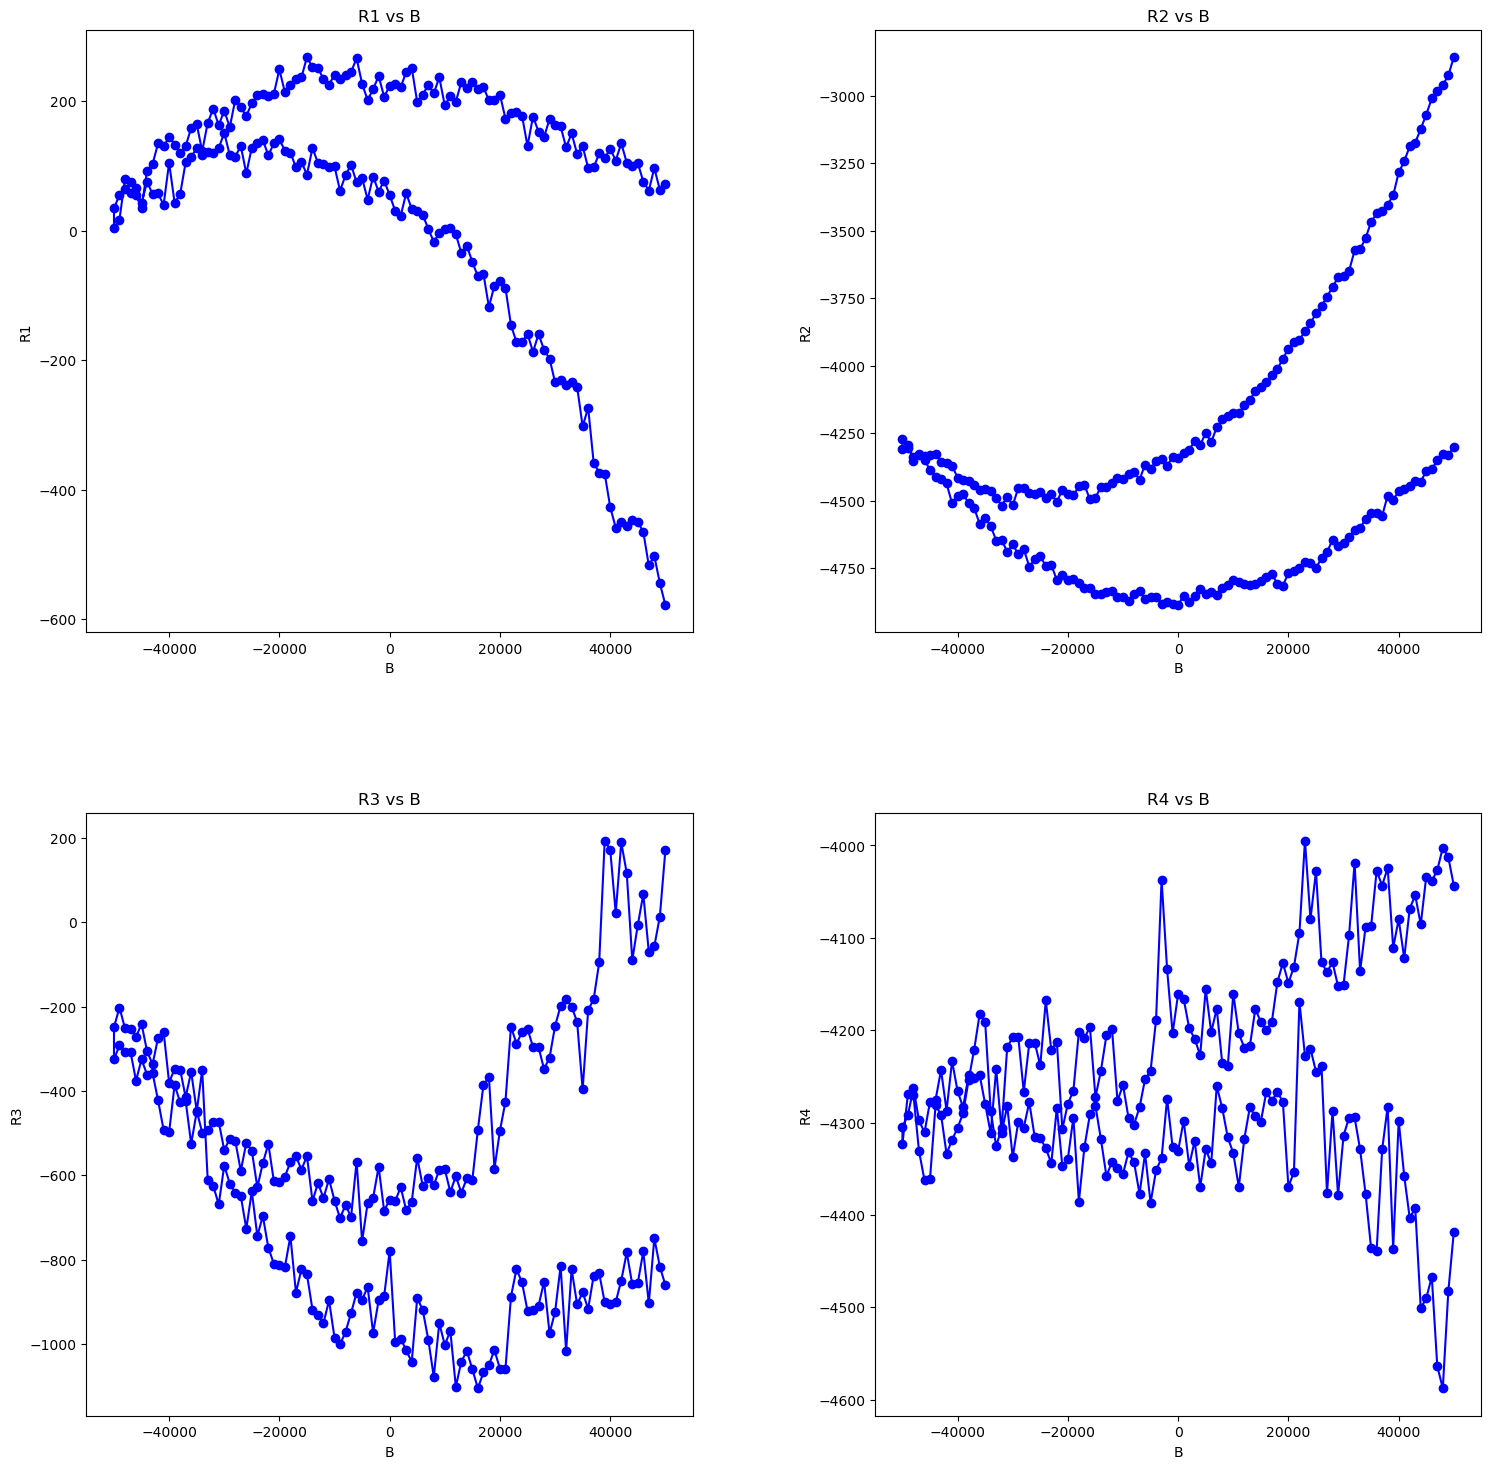

In [809]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [810]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

0


In [811]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

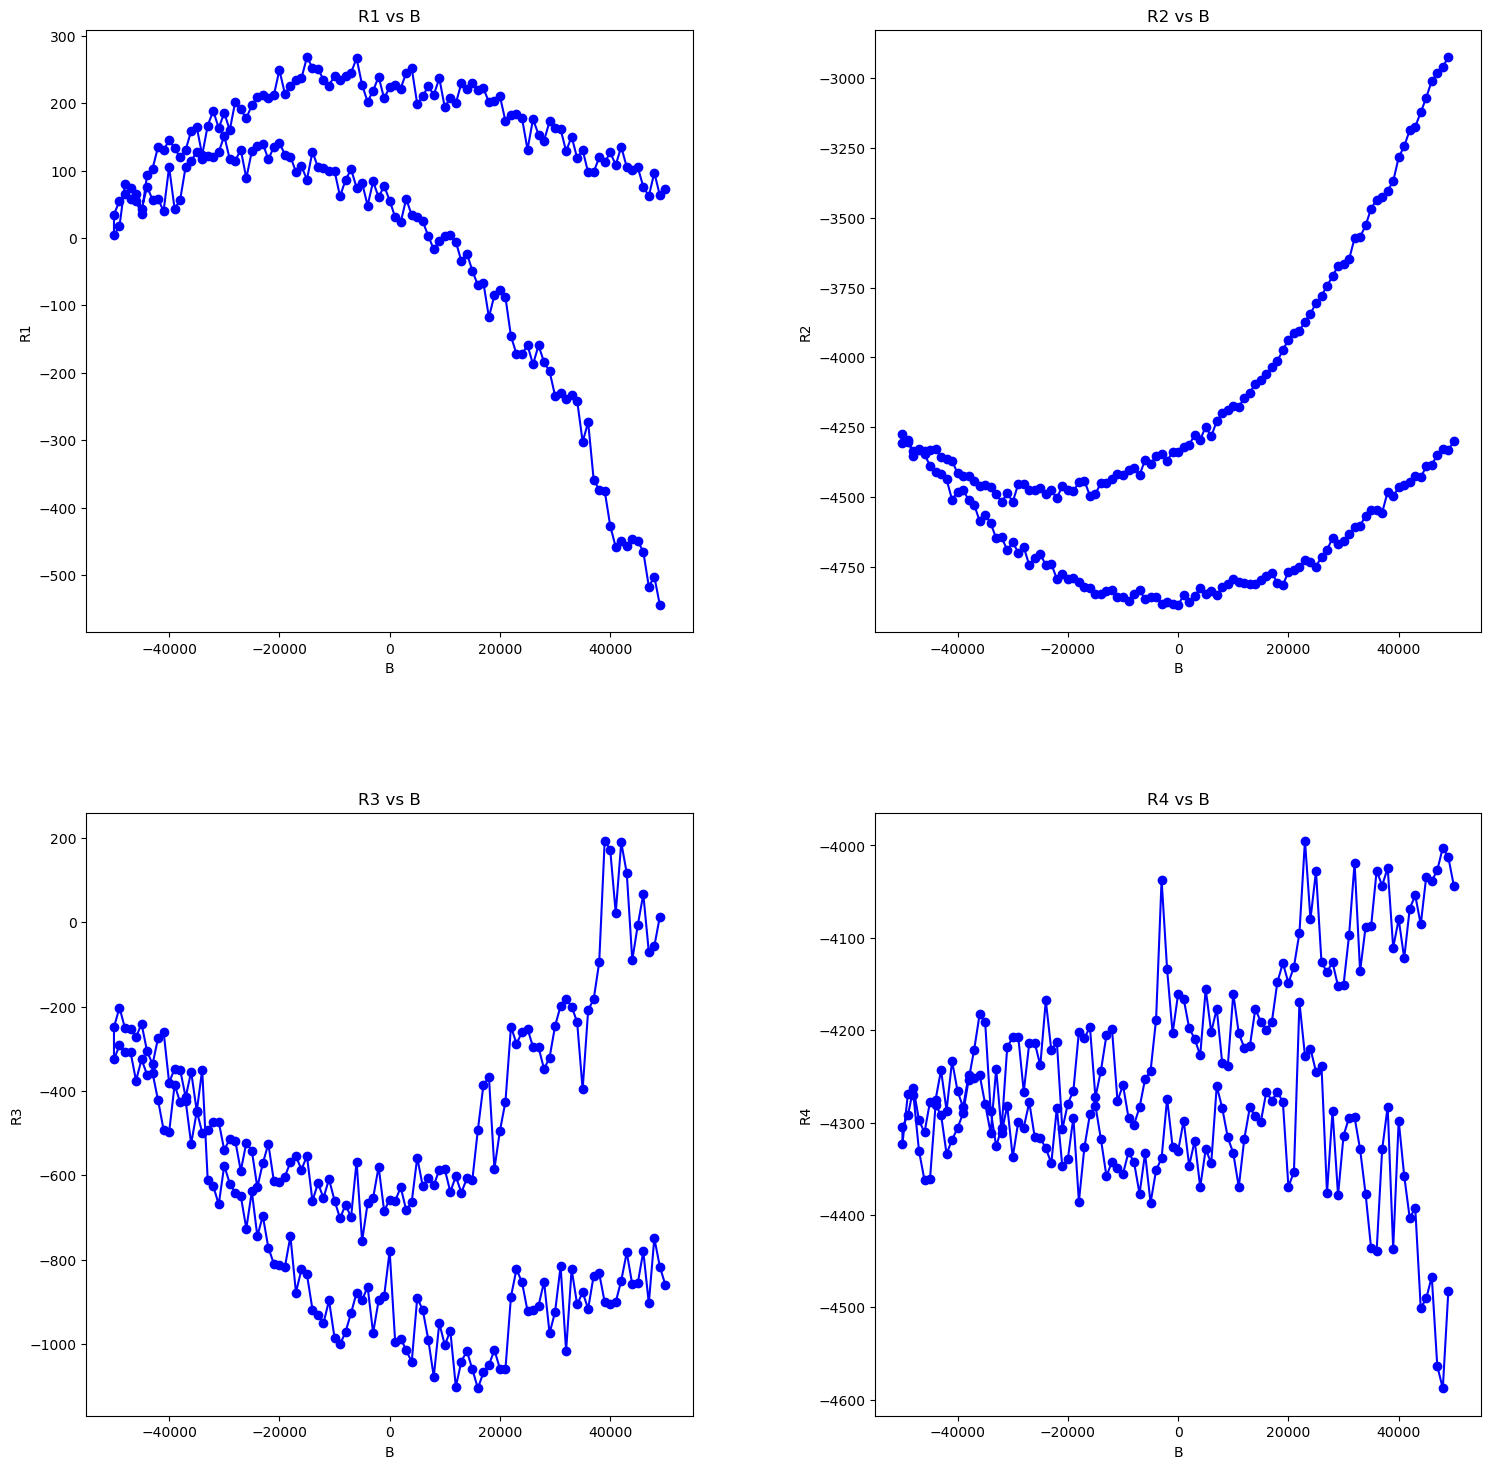

In [812]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [813]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [814]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

99

In [815]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [816]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49000.441797,49000,299.996207,-544.483501,-2924.647609,13.624638,-4482.832998,-0.000117,1000000.0
1,0.000001,48000.578516,48000,299.996953,-502.578228,-2959.596901,-56.525524,-4587.749939,-0.000129,1000000.0
2,0.000001,47000.233789,47000,299.996831,-517.226867,-2982.874338,-70.251639,-4563.801254,-0.000136,1000000.0
3,0.000001,46000.420898,46000,299.999380,-465.521122,-3009.308688,67.137925,-4466.771025,-0.000139,1000000.0
4,0.000001,45000.298438,45000,299.996783,-449.668009,-3069.376671,-6.521892,-4490.352665,-0.000129,1000000.0


In [817]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
100,0.000001,-50000.605859,-50000,300.000011,34.589333,-4273.754413,-325.003085,-4323.064535,-0.000145,1000000.0
101,0.000001,-49000.286914,-49000,300.002499,55.184591,-4304.308451,-291.820344,-4268.579488,-0.000145,1000000.0
102,0.000001,-48000.582031,-48000,300.001384,65.161569,-4337.192731,-308.589330,-4270.548680,-0.000138,1000000.0
103,0.000001,-47000.624414,-47000,300.001524,58.322244,-4327.371413,-307.211636,-4330.715046,-0.000146,1000000.0
104,0.000001,-46000.481445,-46000,299.999130,54.494078,-4348.030935,-375.585685,-4362.466908,-0.000127,1000000.0


In [818]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [819]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,49000,299.996207,-544.483501,-2924.647609,13.624638,-4482.832998,55.184591,-4304.308451,-291.820344,-4268.579488,1000000.0
1,0.000001,48000,299.996953,-502.578228,-2959.596901,-56.525524,-4587.749939,65.161569,-4337.192731,-308.589330,-4270.548680,1000000.0
2,0.000001,47000,299.996831,-517.226867,-2982.874338,-70.251639,-4563.801254,58.322244,-4327.371413,-307.211636,-4330.715046,1000000.0
3,0.000001,46000,299.999380,-465.521122,-3009.308688,67.137925,-4466.771025,54.494078,-4348.030935,-375.585685,-4362.466908,1000000.0
4,0.000001,45000,299.996783,-449.668009,-3069.376671,-6.521892,-4490.352665,35.668704,-4387.527527,-325.123953,-4361.005365,1000000.0


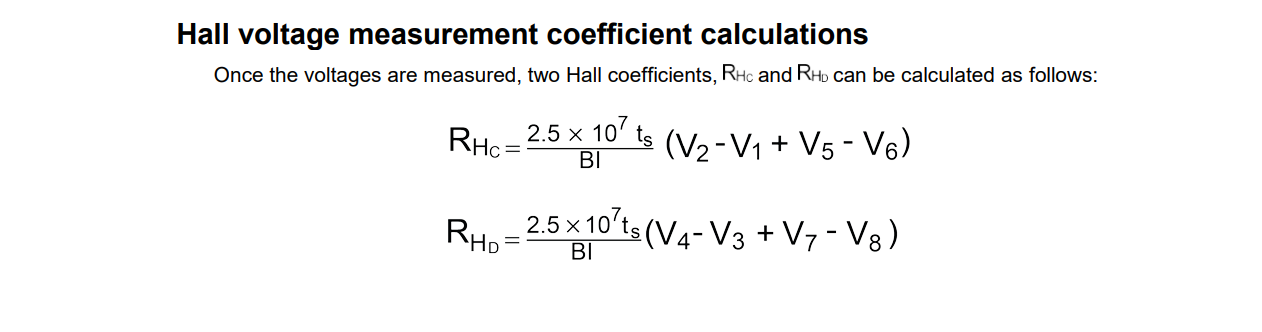
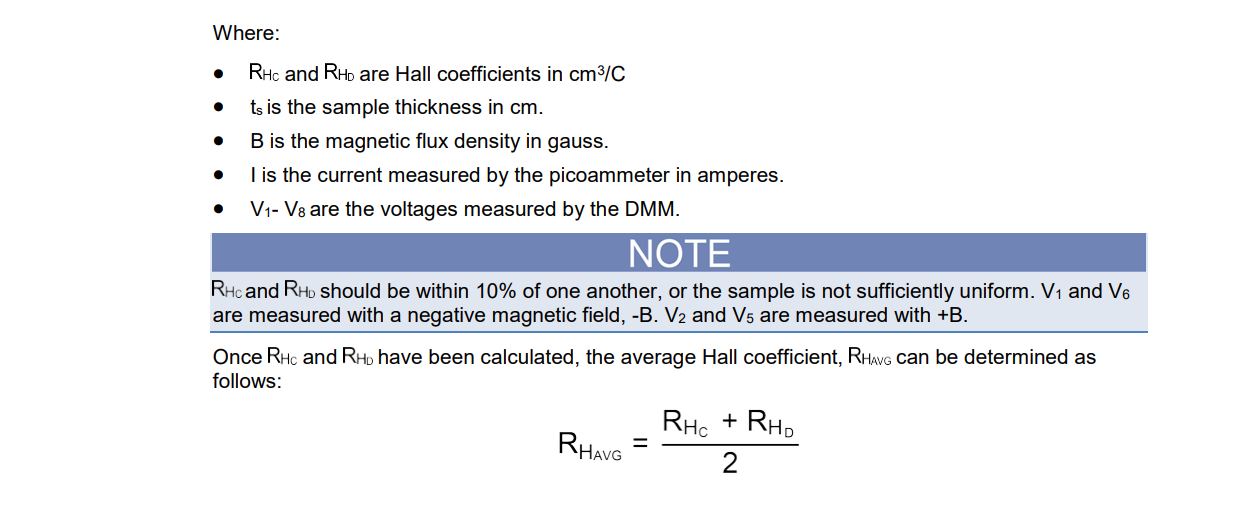

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [820]:
data_dec['RHc'] = (data_dec['V2']- data_dec['V1'] + data_dec['V5'] - data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (data_dec['V4'] - data_dec['V3'] + data_dec['V7'] - data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

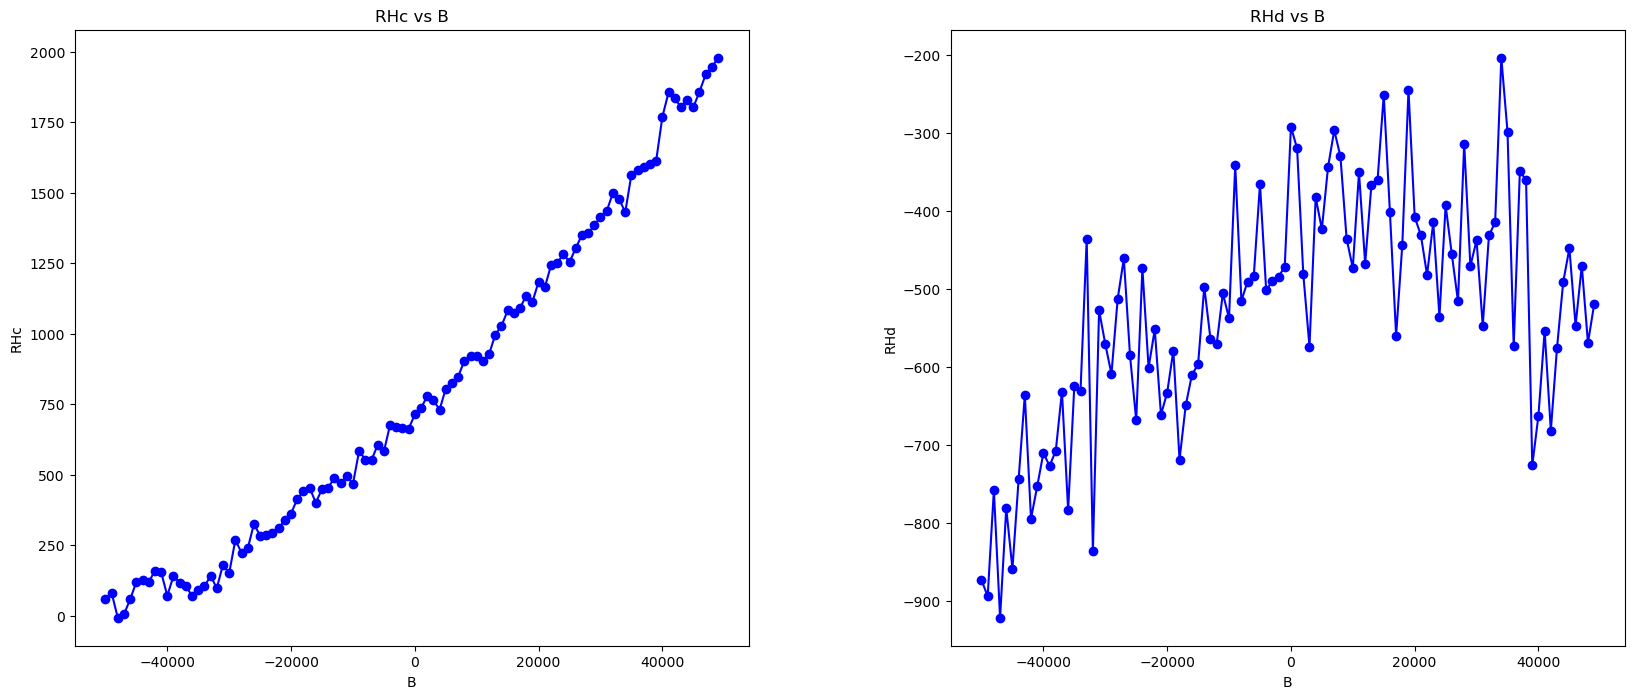

In [821]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

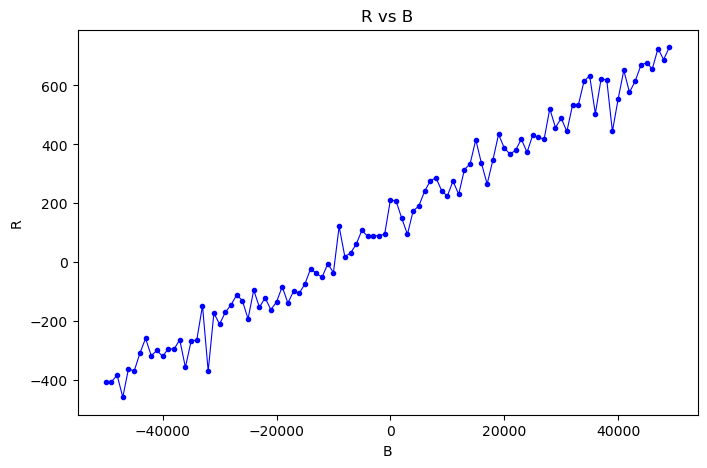

In [822]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [823]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-49000,300.002499,55.184591,-4304.308451,-291.820344,-4268.579488,-544.483501,-2924.647609,13.624638,-4482.832998,1000000.0
1,0.000001,-48000,300.001384,65.161569,-4337.192731,-308.589330,-4270.548680,-502.578228,-2959.596901,-56.525524,-4587.749939,1000000.0
2,0.000001,-47000,300.001524,58.322244,-4327.371413,-307.211636,-4330.715046,-517.226867,-2982.874338,-70.251639,-4563.801254,1000000.0
3,0.000001,-46000,299.999130,54.494078,-4348.030935,-375.585685,-4362.466908,-465.521122,-3009.308688,67.137925,-4466.771025,1000000.0
4,0.000001,-45000,299.998685,35.668704,-4387.527527,-325.123953,-4361.005365,-449.668009,-3069.376671,-6.521892,-4490.352665,1000000.0


### Hall resistance calculation

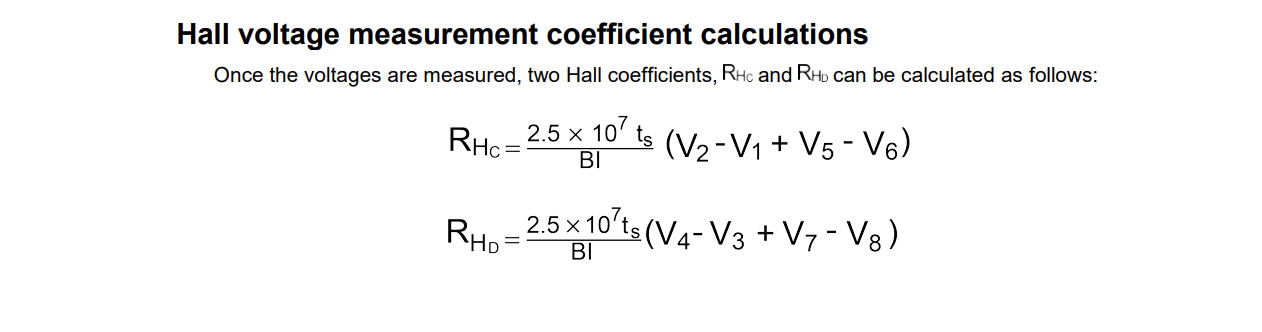

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [824]:
data_inc['RHc'] = (data_inc['V2'] - data_inc['V1'] + data_inc['V5'] - data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (data_inc['V4'] - data_inc['V3'] + data_inc['V7'] - data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2
data_inc['R']

0    -729.815221
1    -688.035280
2    -724.999990
3    -655.854860
4    -677.769104
         ...    
95    361.317198
96    457.792076
97    382.319996
98    406.203686
99    406.126169
Name: R, Length: 100, dtype: float64

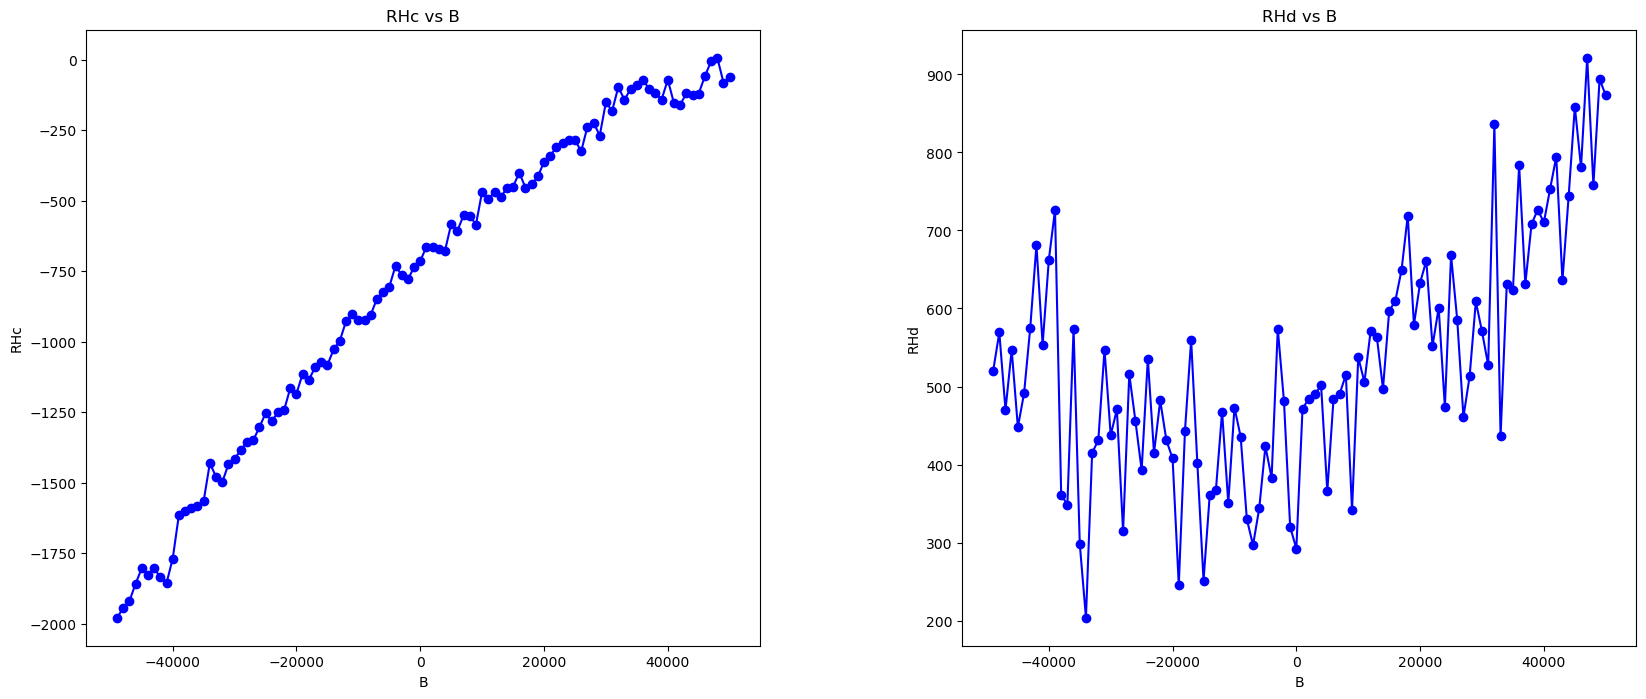

In [825]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

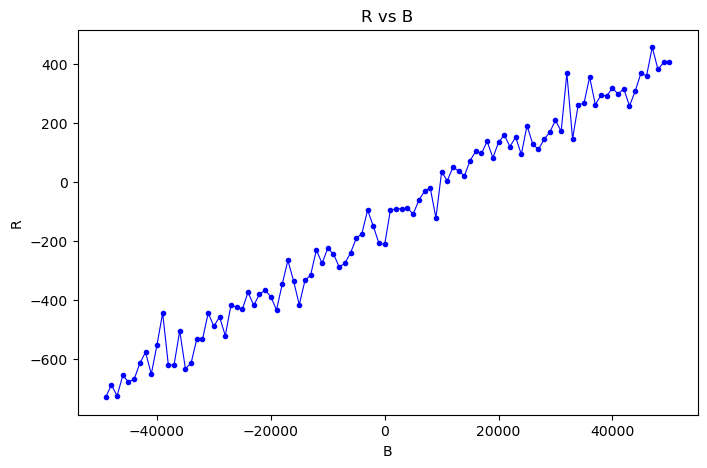

In [826]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

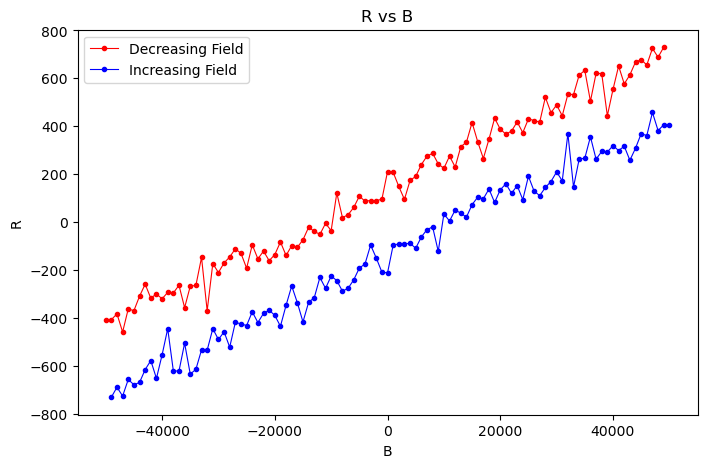

In [827]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [828]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')